### Load data

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
import random

import ipywidgets

from correlation_enrichment.library import SimilarityCalculator
from library_regulons import *
import jupyter_functions as jf


In [2]:
dataPath=module_path+'/data_expression/'
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
conditions = pd.read_csv(dataPath + 'conditions_mergedGenes.tsv', sep='\t', index_col=None)
neighbour_calculator = NeighbourCalculator(genes,conditions=conditions,conditions_names_column='Measurment')

NameError: name 'module_path' is not defined

## Select similarity threshold for obtaining genes with at least as similar (threshold) neighbours

#### Avaliable replicates for determining  genes with at least how similar neighbour should still be used

In [3]:
availiable_replicates=list(set(conditions.loc[:,'Replicate']))
#availiable_replicates

In [6]:
#TODO pack in fucntion
filter_column_values_sub=random.sample(availiable_replicates,30)
print(filter_column_values_sub)
filter_column_values_test=availiable_replicates.copy()
for sub in filter_column_values_sub:
    filter_column_values_test.remove(sub)
print(filter_column_values_test)

['gtaG_r2', 'tgrB1C1_r2', 'dgcA_r2', 'AX4_pool21', 'cudA_r2', 'gtaG_r1', 'tgrC1_r1', 'tagB_bio1', 'ac3pkaCoe_r1', 'AX4_FDpool01', 'tgrB1_r1', 'AX4_bio1', 'cudA_r3', 'tgrB1_r2', 'pkaCoeAX4_r2', 'ecmA_bio1', 'gtaI_bio1', 'mybBGFP_bio2', 'mybBGFP_bio1', 'ecmA_bio2', 'tgrB1C1_r1', 'gbfA_r3', 'comH_r2', 'pkaR_bio1', 'AX4_bio3', 'pkaCoeAX4_r3', 'AX4_bio2', 'AX4_r2', 'pkaR_bio2', 'comH_r1']
['dgcA_r1', 'gtaI_bio2', 'mybB_bio2', 'AX4_r1', 'mybB_bio1', 'tgrC1_r2', 'AX4_pool19', 'tagB_bio2', 'gbfA_r1', 'ac3pkaCoe_r2', 'AX4_FDpool02']


In [5]:
#filter_column_values_sub=['comH_r1', 'cudA_r2', 'gbfA_r1', 'mybBGFP_bio1','pkaR_bio1']
#filter_column_values_test=['AX4_bio1']

### Number of retained genes and their agreement across different replicate samples based on threshold

In [1]:
summary=neighbour_calculator.plot_select_threshold(thresholds=[0.96,0.97,0.975,0.98,0.985,0.99,0.995,0.999],
                                                   filter_column='Replicate',
                                                   filter_column_values_sub=filter_column_values_sub,
                                                   filter_column_values_test=filter_column_values_test,
                                                   neighbours_n=2)

NameError: name 'neighbour_calculator' is not defined

In [9]:
summary.loc[:,['threshold','N genes','F value']]

,threshold,N genes,F value
0,0.960,8438,0.942178
1,0.970,7372,0.905557
2,0.975,6469,0.870761
3,0.980,5213,0.822053
4,0.985,3646,0.740082
5,0.990,1771,0.626135
6,0.995,365,0.507602
7,0.999,8,0.200000


## Hierarchical clustering

In [7]:
# Use genes with at least one close neighbour in clustering
result = neighbour_calculator.neighbours(2, inverse=False)
hcl = HierarchicalClustering(result, genes, 0.99, inverse=False)

In [8]:
# Use genes with at least one inverse profile neighbour in clustering
result_inverse=neighbour_calculator.neighbours(2, inverse=True)
hcl_inverse = HierarchicalClustering(result_inverse, genes, 0.99, inverse=True)

In [9]:
ca=ClusteringAnalyser(genes.index)

### Cluster statistics based on cutting of hierarchical clustering

,Splitting parameter,Mean silhouette values,Mean max annotation ratio,Median cluster size,N clusters
0,0.001,0.002077,1.000000,1.0,1963
1,0.031,0.162378,0.533074,7.0,213
2,0.061,0.150196,0.420233,19.5,86
3,0.091,0.153059,0.383268,28.0,54
4,0.121,0.163127,0.352140,41.0,39
5,0.151,0.167790,0.338521,44.0,32
6,0.181,0.182637,0.311284,52.5,24
7,0.211,0.189513,0.289883,58.0,23
8,0.241,0.180281,0.284047,66.5,20
9,0.271,0.190951,0.258755,74.0,17


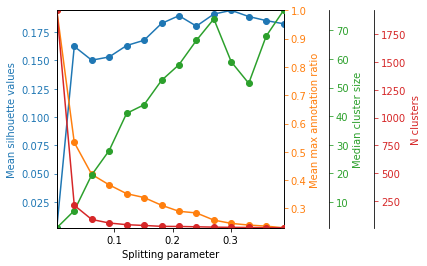

In [10]:
ca.plot_clustering_metrics(clustering=hcl, splittings=np.arange(0.001,0.4,0.03))

#### Clustering dendrogram for cutting at specified height

In [11]:
def plot_clustering(splitting):
    hcl.plot_clustering(cutting_distance=splitting)
ipywidgets.interact(plot_clustering,splitting=(0, 3, 0.05))

interactive(children=(FloatSlider(value=1.0, description='splitting', max=3.0, step=0.05), Output()), _dom_cla…

<function __main__.plot_clustering(splitting)>

#### Cluster size distribution fir cutting at specified height

In [12]:
def plot_clustering(splitting):
    hcl.plot_cluster_sizes(splitting=splitting)
ipywidgets.interact(plot_clustering,splitting=(0, 3, 0.05))

interactive(children=(FloatSlider(value=1.0, description='splitting', max=3.0, step=0.05), Output()), _dom_cla…

<function __main__.plot_clustering(splitting)>

In [13]:
hcl.save_clusters(splitting=0.1,file='Clusters_0.1.tsv')